## Imports

In [1]:
from dataset import ChestXray14
from model import get_encoder
import tqdm
import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
import random
from einops import rearrange, repeat
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
from medcam import medcam

In [2]:
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from main import get_tuning_func

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [3]:
config = {
    "lr": tune.loguniform(1e-5, 1e-1),
    "preprocess": tune.choice(['orig', 'norm', "complement"]),
    "batch_size": tune.choice([16, 32, 64])
}
scheduler = ASHAScheduler(
    metric="loss",
    mode="min",
    max_t=15,
    grace_period=1,
    reduction_factor=2)
reporter = CLIReporter(
    parameter_columns=["lr", "preprocess", "batch_size"],
    metric_columns=["loss", "training_iteration"])
cardiomegaly_result = tune.run(
    get_tuning_func("Opacity"),
    resources_per_trial={"cpu": 1, "gpu": 1},
    config=config,
    num_samples=10,
    scheduler=scheduler,
    progress_reporter=reporter)



== Status ==
Current time: 2022-09-13 17:33:27 (running for 00:00:00.15)
Memory usage on this node: 15.5/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | PENDING  |                     | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

(tuner pid=761792) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
(tuner pid=761852) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 17:33:33 (running for 00:00:06.99)
Memory usage on this node: 22.8/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:33:58 (running for 00:00:32.01)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:34:23 (running for 00:00:57.03)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:34:48 (running for 00:01:22.05)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:35:13 (running for 00:01:47.08)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:35:38 (running for 00:02:12.10)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

(tuner pid=761792) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:35:48 (running for 00:02:22.11)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:36:13 (running for 00:02:47.13)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:36:39 (running for 00:03:12.15)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

== Status ==
Current time: 2022-09-13 17:37:04 (running for 00:03:37.17)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (8 PENDING, 2 RUNNING)
+-------------------+----------+---------------------+-------------+--------------+--------------+
| Trial name        | status   | loc                 |          lr | preprocess   |   batch_size |
|-------------------+----------+---------------------+-------------+--------------+--------------|
| tuner_d92c7_00000 | RUNNING  | 10.19.78.169:761792 | 2.81007e-05 | complement   |           32 |
| tuner_d92c7_00001 | RUNNING  | 10.19.78.169:761852 | 0.062801    | orig         |           16 |
| tuner_d92c7_00002 | PENDING  |       

(tuner pid=766128) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 17:37:30 (running for 00:04:04.04)
Memory usage on this node: 22.3/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:37:50 (running for 00:04:24.06)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:38:10 (running for 00:04:44.08)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:38:30 (running for 00:05:04.10)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

(tuner pid=766128) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:38:40 (running for 00:05:14.11)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:39:00 (running for 00:05:34.13)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:39:05 (running for 00:05:39.14)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:39:26 (running for 00:05:59.16)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:39:46 (running for 00:06:19.18)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:40:06 (running for 00:06:39.20)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:40:26 (running for 00:06:59.22)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:40:46 (running for 00:07:19.24)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

== Status ==
Current time: 2022-09-13 17:41:06 (running for 00:07:39.27)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.7178928059111365
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (7 PENDING, 2 RUNNING, 1 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |           16 |

(tuner pid=769976) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 17:41:27 (running for 00:08:01.06)
Memory usage on this node: 22.4/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:41:47 (running for 00:08:21.08)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:41:57 (running for 00:08:31.09)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:42:17 (running for 00:08:51.11)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:42:37 (running for 00:09:11.13)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

(tuner pid=769976) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:42:53 (running for 00:09:26.15)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:43:13 (running for 00:09:46.17)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:43:33 (running for 00:10:06.19)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:43:53 (running for 00:10:26.21)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:44:13 (running for 00:10:46.23)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:44:33 (running for 00:11:06.26)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:44:53 (running for 00:11:26.28)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:45:14 (running for 00:11:47.77)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7425981449472295
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:45:30 (running for 00:12:03.36)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:45:50 (running for 00:12:23.38)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:46:10 (running for 00:12:43.40)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:46:30 (running for 00:13:03.43)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:46:50 (running for 00:13:23.45)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

(tuner pid=769976) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:47:05 (running for 00:13:38.47)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:47:25 (running for 00:13:58.49)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:47:45 (running for 00:14:18.51)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:48:05 (running for 00:14:38.53)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:48:25 (running for 00:14:58.55)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:48:45 (running for 00:15:18.57)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    | orig         |

== Status ==
Current time: 2022-09-13 17:49:10 (running for 00:15:43.58)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (6 PENDING, 2 RUNNING, 2 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=777837) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 17:49:17 (running for 00:15:51.10)
Memory usage on this node: 22.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:49:27 (running for 00:16:01.11)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:49:32 (running for 00:16:06.12)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:49:53 (running for 00:16:26.14)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:50:13 (running for 00:16:46.16)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:50:33 (running for 00:17:06.18)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:50:53 (running for 00:17:26.20)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:51:13 (running for 00:17:46.23)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:51:33 (running for 00:18:06.24)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:51:53 (running for 00:18:26.27)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:52:13 (running for 00:18:46.29)
Memory usage on this node: 23.1/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:52:33 (running for 00:19:06.31)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:52:56 (running for 00:19:29.48)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:53:17 (running for 00:19:50.77)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:53:37 (running for 00:20:10.80)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:53:57 (running for 00:20:30.82)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:54:17 (running for 00:20:50.84)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:54:37 (running for 00:21:10.86)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:54:57 (running for 00:21:30.88)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:55:07 (running for 00:21:40.89)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:55:27 (running for 00:22:00.92)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:55:42 (running for 00:22:15.93)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:56:02 (running for 00:22:35.96)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:56:22 (running for 00:22:55.98)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:56:42 (running for 00:23:16.11)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7249153699151829 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

Result for tuner_d92c7_00004:
  date: 2022-09-13_17-56-59
  done: false
  experiment_id: 3987d9a2b57840e8baae6f39fd48d3b0
  hostname: bdrad4
  iterations_since_restore: 2
  loss: 0.6409809682462309
  node_ip: 10.19.78.169
  pid: 777837
  should_checkpoint: true
  time_since_restore: 464.8263235092163
  time_this_iter_s: 232.10682320594788
  time_total_s: 464.8263235092163
  timestamp: 1663117019
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: d92c7_00004
  warmup_time: 0.00244903564453125
  


(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:57:04 (running for 00:23:37.87)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:57:24 (running for 00:23:57.89)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:57:44 (running for 00:24:17.92)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:58:04 (running for 00:24:37.94)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 17:58:19 (running for 00:24:52.95)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:58:39 (running for 00:25:12.98)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:58:59 (running for 00:25:33.00)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:59:19 (running for 00:25:53.02)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:59:39 (running for 00:26:13.04)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 17:59:59 (running for 00:26:33.07)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:00:19 (running for 00:26:53.09)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:00:44 (running for 00:27:17.31)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:01:04 (running for 00:27:37.78)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:01:24 (running for 00:27:57.80)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:01:34 (running for 00:28:07.81)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:01:49 (running for 00:28:22.82)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:02:09 (running for 00:28:42.85)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:02:29 (running for 00:29:02.87)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:02:49 (running for 00:29:22.89)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:03:09 (running for 00:29:42.91)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:03:29 (running for 00:30:02.94)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:03:49 (running for 00:30:22.96)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:04:09 (running for 00:30:42.99)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: None | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 | 0.062801    |

== Status ==
Current time: 2022-09-13 18:04:30 (running for 00:31:03.40)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:04:54 (running for 00:31:27.39)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:05:14 (running for 00:31:47.41)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:05:29 (running for 00:32:02.43)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:05:49 (running for 00:32:22.45)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:06:09 (running for 00:32:42.47)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:06:29 (running for 00:33:02.50)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:06:49 (running for 00:33:22.52)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:07:04 (running for 00:33:37.54)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:07:24 (running for 00:33:57.56)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:07:44 (running for 00:34:17.58)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:08:04 (running for 00:34:37.61)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:08:25 (running for 00:34:59.14)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:08:50 (running for 00:35:23.19)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:09:10 (running for 00:35:43.21)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:09:30 (running for 00:36:03.23)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:09:50 (running for 00:36:23.25)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:10:00 (running for 00:36:33.26)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:10:20 (running for 00:36:53.28)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:10:25 (running for 00:36:58.29)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:10:45 (running for 00:37:18.32)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:11:05 (running for 00:37:38.34)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:11:25 (running for 00:37:58.36)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:11:45 (running for 00:38:18.38)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

Result for tuner_d92c7_00001:
  date: 2022-09-13_18-12-03
  done: false
  experiment_id: c544eb5332ee49a5b90a23e0377db0f9
  hostname: bdrad4
  iterations_since_restore: 10
  loss: 0.7183691254690301
  node_ip: 10.19.78.169
  pid: 761852
  should_checkpoint: true
  time_since_restore: 2312.425810813904
  time_this_iter_s: 232.1624653339386
  time_total_s: 2312.425810813904
  timestamp: 1663117923
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: d92c7_00001
  warmup_time: 0.0022225379943847656
  
== Status ==
Current time: 2022-09-13 18:12:08 (running for 00:38:41.29)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Numb

== Status ==
Current time: 2022-09-13 18:12:26 (running for 00:38:59.90)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:12:46 (running for 00:39:19.92)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:13:06 (running for 00:39:39.95)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:13:26 (running for 00:39:59.97)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:13:46 (running for 00:40:19.99)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:13:56 (running for 00:40:30.01)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:14:16 (running for 00:40:50.03)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:14:36 (running for 00:41:10.05)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:14:46 (running for 00:41:20.07)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:15:06 (running for 00:41:40.09)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:15:26 (running for 00:42:00.11)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:15:46 (running for 00:42:20.14)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:16:09 (running for 00:42:42.25)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:16:30 (running for 00:43:03.41)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:16:50 (running for 00:43:23.44)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:17:10 (running for 00:43:43.46)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:17:30 (running for 00:44:03.48)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:17:40 (running for 00:44:13.49)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:18:00 (running for 00:44:33.52)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:18:20 (running for 00:44:53.54)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:18:40 (running for 00:45:13.56)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:19:00 (running for 00:45:33.58)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:19:20 (running for 00:45:53.61)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:19:40 (running for 00:46:13.63)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:20:01 (running for 00:46:34.15)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7378442636743513 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:20:22 (running for 00:46:55.69)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:20:42 (running for 00:47:15.71)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:20:57 (running for 00:47:30.73)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:21:17 (running for 00:47:50.75)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:21:37 (running for 00:48:10.78)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:21:57 (running for 00:48:30.80)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:22:17 (running for 00:48:50.82)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:22:37 (running for 00:49:10.85)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:22:57 (running for 00:49:30.87)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:23:17 (running for 00:49:50.89)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

Result for tuner_d92c7_00001:
  date: 2022-09-13_18-23-37
  done: false
  experiment_id: c544eb5332ee49a5b90a23e0377db0f9
  hostname: bdrad4
  iterations_since_restore: 13
  loss: 0.7007465010115654
  node_ip: 10.19.78.169
  pid: 761852
  should_checkpoint: true
  time_since_restore: 3006.8838760852814
  time_this_iter_s: 231.60701823234558
  time_total_s: 3006.8838760852814
  timestamp: 1663118617
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: d92c7_00001
  warmup_time: 0.0022225379943847656
  
== Status ==
Current time: 2022-09-13 18:23:42 (running for 00:50:15.75)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
N

== Status ==
Current time: 2022-09-13 18:23:59 (running for 00:50:32.94)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:24:19 (running for 00:50:52.96)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:24:39 (running for 00:51:12.99)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:24:59 (running for 00:51:33.01)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:25:19 (running for 00:51:53.03)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:25:39 (running for 00:52:13.06)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:25:49 (running for 00:52:23.07)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=761852) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:26:04 (running for 00:52:38.08)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:26:24 (running for 00:52:58.11)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:26:44 (running for 00:53:18.13)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:27:05 (running for 00:53:38.15)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

== Status ==
Current time: 2022-09-13 18:27:25 (running for 00:53:58.17)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (5 PENDING, 2 RUNNING, 3 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00001 | RUNNING    | 10.19.78.169:761852 

(tuner pid=815685) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 18:27:37 (running for 00:54:10.29)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:27:58 (running for 00:54:31.95)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:28:18 (running for 00:54:51.97)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:28:38 (running for 00:55:11.99)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=815685) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:28:48 (running for 00:55:22.00)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:29:08 (running for 00:55:42.03)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:29:28 (running for 00:56:02.05)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:29:48 (running for 00:56:22.07)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:30:03 (running for 00:56:37.09)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:30:23 (running for 00:56:57.11)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:30:43 (running for 00:57:17.13)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:31:04 (running for 00:57:37.15)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:31:24 (running for 00:57:57.17)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (4 PENDING, 2 RUNNING, 4 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=819483) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 18:31:31 (running for 00:58:04.31)
Memory usage on this node: 22.6/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:31:54 (running for 00:58:27.95)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:32:14 (running for 00:58:47.98)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:32:34 (running for 00:59:08.00)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:32:54 (running for 00:59:28.02)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:33:14 (running for 00:59:48.04)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:33:19 (running for 00:59:53.05)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=819483) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:33:34 (running for 01:00:08.07)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:33:54 (running for 01:00:28.09)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:34:14 (running for 01:00:48.11)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:34:34 (running for 01:01:08.13)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:34:55 (running for 01:01:28.16)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:35:15 (running for 01:01:48.18)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7240558785719198
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:35:30 (running for 01:02:03.73)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:35:50 (running for 01:02:23.76)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=819483) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:35:55 (running for 01:02:28.77)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:36:00 (running for 01:02:33.77)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:36:20 (running for 01:02:53.79)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:36:40 (running for 01:03:13.82)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:37:00 (running for 01:03:33.84)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:37:20 (running for 01:03:53.86)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:37:40 (running for 01:04:13.88)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:38:00 (running for 01:04:33.91)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:38:20 (running for 01:04:53.93)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:38:40 (running for 01:05:13.95)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:39:00 (running for 01:05:33.97)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.7054123749955089 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

Result for tuner_d92c7_00006:
  date: 2022-09-13_18-39-16
  done: false
  experiment_id: da1f07650c7244ce96c8acafc7b5e32c
  hostname: bdrad4
  iterations_since_restore: 2
  loss: 0.6891297347194798
  node_ip: 10.19.78.169
  pid: 819483
  should_checkpoint: true
  time_since_restore: 468.4784984588623
  time_this_iter_s: 233.5279552936554
  time_total_s: 468.4784984588623
  timestamp: 1663119556
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: d92c7_00006
  warmup_time: 0.0022864341735839844
  
Result for tuner_d92c7_00004:
  date: 2022-09-13_18-39-16
  done: false
  experiment_id: 3987d9a2b57840e8baae6f39fd48d3b0
  hostname: bdrad4
  iterations_since_restore: 13
  loss: 0.8064148474383999
  node_ip: 10.19.78.169
  pid: 777837
  should_checkpoint: true
  time_since_restore: 3001.950991868973
  time_this_iter_s: 231.27443313598633
  time_total_s: 3001.950991868973
  timestamp: 1663119556
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: d92c7_00004
  warmu

== Status ==
Current time: 2022-09-13 18:39:36 (running for 01:06:10.02)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:39:56 (running for 01:06:30.04)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=777837) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:40:01 (running for 01:06:35.05)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=819483) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:40:21 (running for 01:06:55.07)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:40:41 (running for 01:07:15.09)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:41:01 (running for 01:07:35.12)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:41:22 (running for 01:07:55.14)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:41:42 (running for 01:08:15.16)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:42:02 (running for 01:08:35.19)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:42:22 (running for 01:08:55.21)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:42:42 (running for 01:09:15.23)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

== Status ==
Current time: 2022-09-13 18:43:02 (running for 01:09:35.25)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (3 PENDING, 2 RUNNING, 5 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00004 | RUNNING    | 10.19.78.169:777837 

(tuner pid=830900) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 18:43:14 (running for 01:09:48.05)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

(tuner pid=819483) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:43:19 (running for 01:09:53.06)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:43:39 (running for 01:10:13.08)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:43:59 (running for 01:10:33.11)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:44:19 (running for 01:10:53.13)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:44:40 (running for 01:11:13.15)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:45:00 (running for 01:11:33.17)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:45:20 (running for 01:11:53.19)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:45:40 (running for 01:12:13.22)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

(tuner pid=830900) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:45:50 (running for 01:12:23.23)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:46:10 (running for 01:12:43.25)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:46:30 (running for 01:13:03.28)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

== Status ==
Current time: 2022-09-13 18:46:50 (running for 01:13:23.30)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6733575646497808 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7212521918901094
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 PENDING, 2 RUNNING, 6 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00006 | RUNNING    | 10.19.78.169:819483 

(tuner pid=835075) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 18:47:10 (running for 01:13:43.79)
Memory usage on this node: 23.2/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

(tuner pid=835075) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:47:20 (running for 01:13:53.80)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:47:40 (running for 01:14:13.82)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:48:00 (running for 01:14:33.84)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:48:20 (running for 01:14:53.86)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:48:40 (running for 01:15:13.89)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:49:00 (running for 01:15:33.91)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:49:20 (running for 01:15:53.93)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

(tuner pid=830900) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:49:30 (running for 01:16:03.94)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:49:50 (running for 01:16:23.97)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:50:10 (running for 01:16:43.99)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:50:30 (running for 01:17:04.01)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

== Status ==
Current time: 2022-09-13 18:50:50 (running for 01:17:24.03)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6972710548574943 | Iter 1.000: -0.7133829020433597
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 PENDING, 2 RUNNING, 7 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00007 | RUNNING    | 10.19.78.169:830900 |

(tuner pid=839219) Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


== Status ==
Current time: 2022-09-13 18:51:03 (running for 01:17:36.40)
Memory usage on this node: 22.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:51:23 (running for 01:17:56.42)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:51:43 (running for 01:18:16.44)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:52:03 (running for 01:18:36.46)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:52:23 (running for 01:18:56.48)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:52:43 (running for 01:19:16.51)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=835075) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:52:48 (running for 01:19:21.51)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:53:08 (running for 01:19:41.54)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=839219) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:53:13 (running for 01:19:46.54)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:53:33 (running for 01:20:06.56)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:53:53 (running for 01:20:26.59)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:54:13 (running for 01:20:46.61)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:54:33 (running for 01:21:06.63)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.7019765965030392 | Iter 1.000: -0.7055136121966101
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

Result for tuner_d92c7_00008:
  date: 2022-09-13_18-54-49
  done: false
  experiment_id: 0d04f64c02ce48d29471d8db4cb59f60
  hostname: bdrad4
  iterations_since_restore: 2
  loss: 0.6632087481272472
  node_ip: 10.19.78.169
  pid: 835075
  should_checkpoint: true
  time_since_restore: 464.2716290950775
  time_this_iter_s: 232.0755603313446
  time_total_s: 464.2716290950775
  timestamp: 1663120489
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: d92c7_00008
  warmup_time: 0.002322673797607422
  
Result for tuner_d92c7_00009:
  date: 2022-09-13_18-54-54
  done: false
  experiment_id: e565ebe294cd4eacaa6761d8a2713dc8
  hostname: bdrad4
  iterations_since_restore: 1
  loss: 0.7025792146767224
  node_ip: 10.19.78.169
  pid: 839219
  should_checkpoint: true
  time_since_restore: 233.9218463897705
  time_this_iter_s: 233.9218463897705
  time_total_s: 233.9218463897705
  timestamp: 1663120494
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: d92c7_00009
  warmup_ti

== Status ==
Current time: 2022-09-13 18:55:09 (running for 01:21:42.33)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:55:29 (running for 01:22:02.36)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:55:49 (running for 01:22:22.38)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:56:09 (running for 01:22:42.40)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:56:29 (running for 01:23:02.42)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=839219) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:56:34 (running for 01:23:07.43)
Memory usage on this node: 23.3/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=835075) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:56:54 (running for 01:23:27.45)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:57:14 (running for 01:23:47.48)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:57:34 (running for 01:24:07.50)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:57:54 (running for 01:24:27.52)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:58:14 (running for 01:24:47.54)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:58:34 (running for 01:25:07.57)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6955531656112595 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:58:52 (running for 01:25:25.84)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 18:59:12 (running for 01:25:45.86)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=839219) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:59:32 (running for 01:26:05.89)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

(tuner pid=835075) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 18:59:47 (running for 01:26:20.90)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:00:07 (running for 01:26:40.93)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:00:27 (running for 01:27:00.95)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:00:47 (running for 01:27:20.97)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:01:07 (running for 01:27:41.00)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:01:27 (running for 01:28:01.02)
Memory usage on this node: 23.4/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:01:47 (running for 01:28:21.04)
Memory usage on this node: 23.5/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:02:07 (running for 01:28:41.06)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:02:27 (running for 01:29:01.08)
Memory usage on this node: 23.6/125.6 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.695475992855725 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 2.0/64 CPUs, 2.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (2 RUNNING, 8 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00008 | RUNNING    | 10.19.78.169:835075 | 0.00327026

== Status ==
Current time: 2022-09-13 19:02:49 (running for 01:29:22.98)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

(tuner pid=839219) libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


== Status ==
Current time: 2022-09-13 19:02:54 (running for 01:29:27.98)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:03:14 (running for 01:29:48.00)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:03:34 (running for 01:30:08.03)
Memory usage on this node: 19.6/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:03:54 (running for 01:30:28.05)
Memory usage on this node: 19.7/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:04:14 (running for 01:30:48.07)
Memory usage on this node: 19.6/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:04:34 (running for 01:31:08.09)
Memory usage on this node: 19.6/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:04:54 (running for 01:31:28.12)
Memory usage on this node: 19.6/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:05:14 (running for 01:31:48.14)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:05:35 (running for 01:32:08.16)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:05:55 (running for 01:32:28.18)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

== Status ==
Current time: 2022-09-13 19:06:15 (running for 01:32:48.20)
Memory usage on this node: 19.5/125.6 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6960688463116536 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 1.0/64 CPUs, 1.0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------+
| Trial name        | status     | loc                 |          lr | preprocess   |   batch_size |     loss |   training_iteration |
|-------------------+------------+---------------------+-------------+--------------+--------------+----------+----------------------|
| tuner_d92c7_00009 | RUNNING    | 10.19.78.169:839219 | 0.0002802

2022-09-13 19:06:24,098	INFO tune.py:747 -- Total run time: 5577.25 seconds (5577.13 seconds for the tuning loop).


Result for tuner_d92c7_00009:
  date: 2022-09-13_19-06-23
  done: true
  experiment_id: e565ebe294cd4eacaa6761d8a2713dc8
  hostname: bdrad4
  iterations_since_restore: 4
  loss: 0.718939224699954
  node_ip: 10.19.78.169
  pid: 839219
  should_checkpoint: true
  time_since_restore: 923.7418847084045
  time_this_iter_s: 224.17015409469604
  time_total_s: 923.7418847084045
  timestamp: 1663121183
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: d92c7_00009
  warmup_time: 0.0022296905517578125
  
== Status ==
Current time: 2022-09-13 19:06:23 (running for 01:32:57.13)
Memory usage on this node: 19.2/125.6 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 8.000: -0.7276632183617038 | Iter 4.000: -0.6966616997675821 | Iter 2.000: -0.6891297347194798 | Iter 1.000: -0.7040464134366662
Resources requested: 0/64 CPUs, 0/2 GPUs, 0.0/71.1 GiB heap, 0.0/34.46 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/developer/ray_results/tuner_2022-09-13_17-33-26
Number of t

In [11]:

cardiomegaly_best_trial = cardiomegaly_result.get_best_trial("loss", "min", "last")
print("Best trial config: {}".format(cardiomegaly_best_trial.config))
print("Best trial final validation loss: {}".format(
    cardiomegaly_best_trial.last_result["loss"]))


Best trial config: {'lr': 6.067310636307449e-05, 'preprocess': 'orig', 'batch_size': 16}
Best trial final validation loss: 0.5019663935527205


In [14]:
import os
cardiomegaly_net = torch.hub.load('facebookresearch/deit:main',
                   'deit_tiny_patch16_224', pretrained=True)
num_features = cardiomegaly_net.head.in_features
cardiomegaly_net.head = torch.nn.Linear(num_features, 2)
cardiomegaly_net.to('cuda')

cardiomegaly_best_checkpoint_dir = cardiomegaly_best_trial.checkpoint.value
model_state, optimizer_state = torch.load(os.path.join(
    cardiomegaly_best_checkpoint_dir, "checkpoint"))
cardiomegaly_net.load_state_dict(model_state)

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


<All keys matched successfully>

In [25]:
print (os.path.join(
    cardiomegaly_best_checkpoint_dir, "checkpoint"))

/home/developer/ray_results/tuner_2022-09-13_09-40-33/tuner_c92a1_00000_0_batch_size=16,lr=0.0001,preprocess=orig_2022-09-13_09-40-33/checkpoint_000014/checkpoint


In [15]:
model = cardiomegaly_net

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
device = "cuda"
model_weights_path = 'weights/{}_{}_{}_weights'.format("Cardiomegaly", "orig", 9)
model = get_encoder(encoder_choice="vit")
model = model.to(device)
model.load_state_dict(torch.load(model_weights_path))
model.eval()
test_dataset = ChestXray14(phase='test', class_name="Cardiomegaly")
test_data_loader = DataLoader(test_dataset, shuffle=False)
progress_bar = tqdm.tqdm(test_data_loader)
progress_bar.set_description("Cardiomegaly")
embeddings = []
for data in progress_bar:
    image, label = data
    image, label = image.to(device), label.to(device)        
    output = model(image)
    embeddings.append(output.cpu().detach().numpy())
probabilities = F.softmax(torch.from_numpy(np.array(embeddings)), dim=1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
Cardiomegaly: 100%|███████████████████████████| 556/556 [00:11<00:00, 47.85it/s]


NameError: name 'n_classes' is not defined

## CUDA

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Image Retrieval Tasks

In [9]:
retrieval_tasks = [
    'Cardiomegaly',
    'Opacity',
    'Emphysema',
]

In [4]:
from model import get_encoder


## Embeddings

In [31]:
def data(encoder_choice, class_name):
    model_weights_path = 'weights/{}_{}_{}_weights'.format(class_name, "norm", 7)
    model = get_encoder(encoder_choice=encoder_choice)
    model = model.to(device)
    model.load_state_dict(torch.load(model_weights_path))
    model.eval()
    images = []
    embeddings = []
    labels = []
    test_dataset = ChestXray14(phase='test', class_name=class_name)
    test_data_loader = DataLoader(test_dataset, shuffle=False)
    progress_bar = tqdm.tqdm(test_data_loader)
    progress_bar.set_description(class_name)
    for data in progress_bar:
        image, label = data
        image, label = image.to(device), label.to(device)        
        embedding = model(image)
        image = image.cpu().detach().numpy()[0]
        embedding = embedding.cpu().detach().numpy()[0]
        label = label.cpu().detach().numpy()[0]
        images.append(image)
        embeddings.append(embedding)
        labels.append(label)

    images = np.array(images)
    embeddings = np.array(embeddings)
    labels = np.array(labels)
    return images, embeddings, labels

images = {}
embeddings = {}
labels = {}

for task in retrieval_tasks:
    encoder_choice = 'vit'
    class_name = task
    images[task], embeddings[task], labels[task] = data(encoder_choice, class_name)

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
Cardiomegaly: 100%|███████████████████████████| 556/556 [00:13<00:00, 41.92it/s]
Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
Opacity: 100%|██████████████████████████████| 7097/7097 [02:52<00:00, 41.24it/s]
Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
Emphysema: 100%|██████████████████████████████| 504/504 [00:11<00:00, 42.04it/s]


## Qualitative Analysis

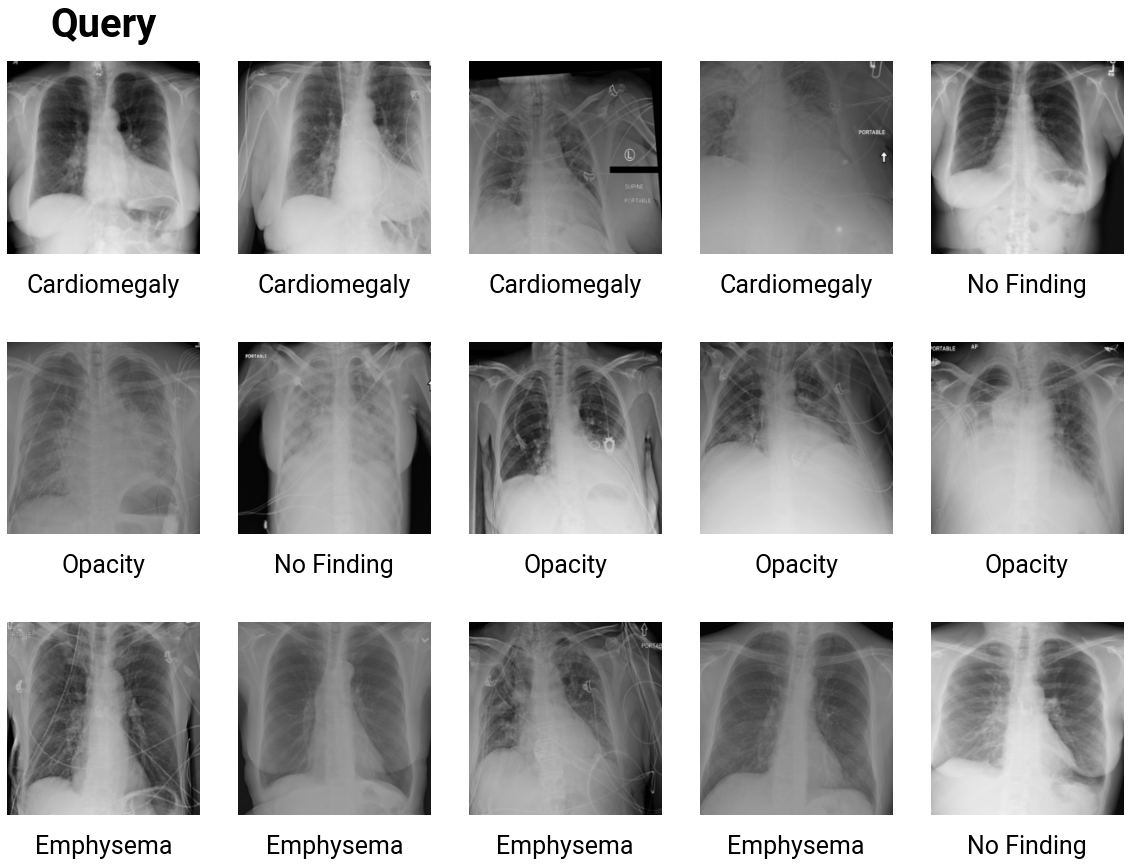

In [11]:
fig, ax = plt.subplots(3, 5, figsize=(20, 14))

path = 'fonts/Roboto-Bold.ttf'
fontprop = fm.FontProperties(fname=path, size=40)
title1 = ax[0][0].set_title('Query', fontproperties=fontprop, pad=25)

plt.subplots_adjust(hspace=0.4)

retrieval_indices = [1, 2722, 133]

for task_index, task in enumerate(retrieval_tasks):
    i = retrieval_indices[task_index]
    nearest_neighbor_indices = cdist(embeddings[task], embeddings[task])[i].argsort()
    nearest_neighbor_indices = nearest_neighbor_indices[nearest_neighbor_indices != i]
    indices = [i]
    indices.extend(nearest_neighbor_indices[:4])

    for image_index, sub_ax in enumerate(ax[task_index]):
        sub_ax.get_xaxis().set_ticks([])
        sub_ax.get_yaxis().set_ticks([])
        for spine in sub_ax.spines:
            sub_ax.spines[spine].set_visible(False)
        path = 'fonts/Roboto-Regular.ttf'
        fontprop = fm.FontProperties(fname=path, size=25)
        image = rearrange(images[task][indices[image_index]], 'c w h -> w h c')
        sub_ax.imshow(image, cmap='Greys_r')
        label = labels[task][indices[image_index]]
        if label:
            label = task
        else:
            label = 'No Finding'
        sub_ax.text(0.5, -0.1, label, ha='center', va='top',
               transform=sub_ax.transAxes, fontproperties=fontprop)

plt.savefig('figures/query.png', bbox_inches='tight')

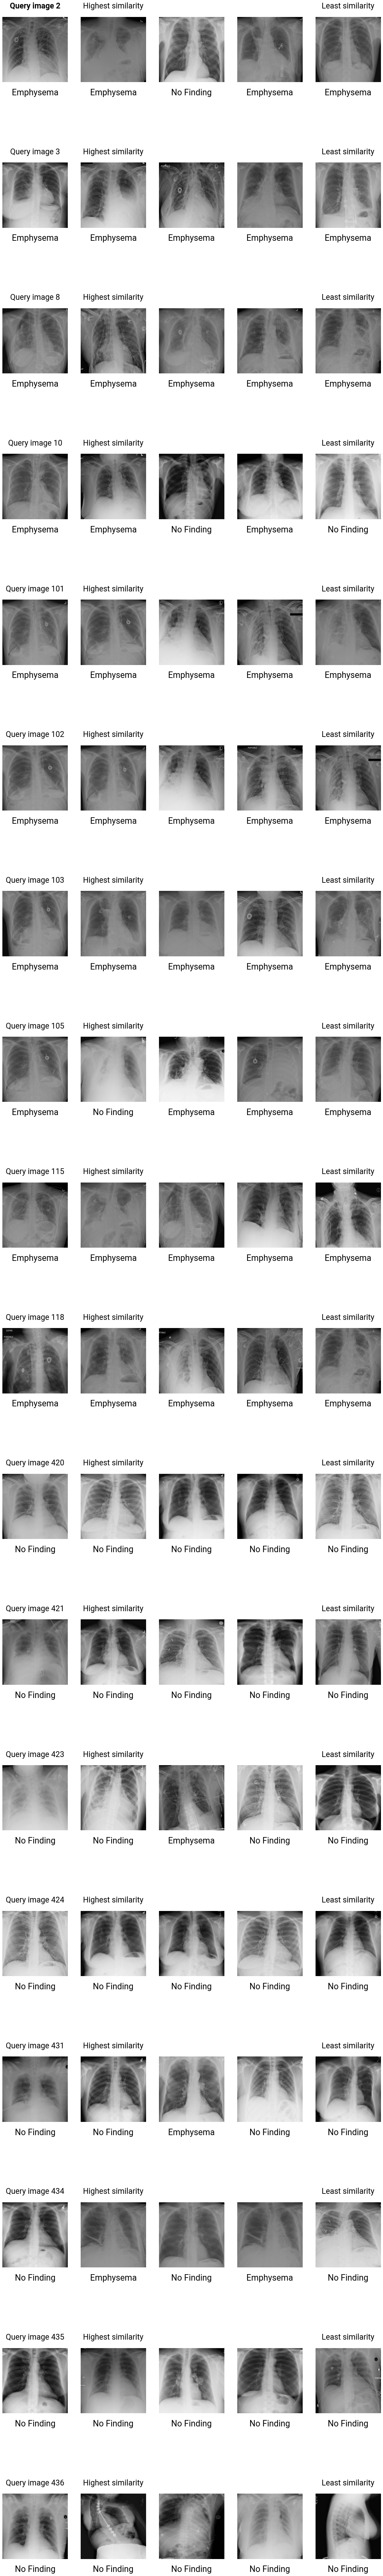

In [12]:
retrieval_indices = [2, 3, 8, 10, 101, 102, 103, 105, 115, 118, 420, 421, 423, 424, 431, 434, 435, 436]
fig, ax = plt.subplots(len(retrieval_indices), 5, figsize=(20, 14 * 10))

path = 'fonts/Roboto-Bold.ttf'
fontprop = fm.FontProperties(fname=path, size=40)
title1 = ax[0][0].set_title('Queries', fontproperties=fontprop, pad=25)

plt.subplots_adjust(hspace=0.4)


for index, i in enumerate(retrieval_indices):
    nearest_neighbor_indices = cdist(embeddings[task], embeddings[task])[i].argsort()
    nearest_neighbor_indices = nearest_neighbor_indices[nearest_neighbor_indices != i]
    indices = [i]
    indices.extend(nearest_neighbor_indices[:4])

    for image_index, sub_ax in enumerate(ax[index]):
        fontprop = fm.FontProperties(fname=path, size=23)
        if image_index == 0:
            title1 = sub_ax.set_title('Query image ' + str(i), fontproperties=fontprop, pad=25)
        if image_index == 1:
            title1 = sub_ax.set_title('Highest similarity', fontproperties=fontprop, pad=25)
        
        if image_index == 4:
            title1 = sub_ax.set_title('Least similarity', fontproperties=fontprop, pad=25)

        sub_ax.get_xaxis().set_ticks([])
        sub_ax.get_yaxis().set_ticks([])
        for spine in sub_ax.spines:
            sub_ax.spines[spine].set_visible(False)
        path = 'fonts/Roboto-Regular.ttf'
        fontprop = fm.FontProperties(fname=path, size=25)
        image = rearrange(images[task][indices[image_index]], 'c w h -> w h c')
        sub_ax.imshow(image, cmap='Greys_r')
        label = labels[task][indices[image_index]]
        if label:
            label = task
        else:
            label = 'No Finding'
        sub_ax.text(0.5, -0.1, label, ha='center', va='top',
               transform=sub_ax.transAxes, fontproperties=fontprop)

plt.savefig('figures/query.png', bbox_inches='tight')

## **Metrics**

In [32]:
def precision_at(embeddings, labels, k, i):
    nearest_neighbor_indices = cdist(embeddings, embeddings)[i].argsort()
    nearest_neighbor_indices = nearest_neighbor_indices[nearest_neighbor_indices != i]
    indices = []
    indices.extend(nearest_neighbor_indices[:k])
    return sum(labels[indices] == labels[i]) / k
    


In [48]:
from scipy import stats

def map_scores(class_name):
    _embeddings = embeddings[class_name]
    _labels = labels[class_name]
    pred_labels = _embeddings.argmax(axis=1)
    rand_embeddings = np.random.random(_embeddings.shape)
    p_at_5 = 0
    precisions = []
    for i in tqdm.tqdm(range(len(_embeddings))):
        precision = precision_at(embeddings = _embeddings, labels=_labels, k=5, i=i)
        p_at_5 += precision
        precisions.append(precision)

    rand_p_at_5 = 0
    rand_precisions = []

    for i in range(len(_embeddings)):
        rand_precision = precision_at(embeddings = rand_embeddings,labels=_labels, k=5, i=i)
        rand_p_at_5 += rand_precision
        rand_precisions.append(rand_precision)
    print (class_name, "Test accuracy:", np.sum(pred_labels == _labels)/(len(_labels)))
    print(class_name, 'MAP at 5: ', p_at_5 / len(_embeddings))
    print(class_name, 'Random MAP at 5: ', rand_p_at_5 / len(_embeddings))
    print (stats.ttest_ind(precisions, rand_precisions))

# for name in ["Cardiomegaly", "Opacity", "Emphysema"]:
#     map_scores(name)
map_scores("Opacity")

100%|███████████████████████████████████████| 7097/7097 [13:29<00:00,  8.77it/s]


Opacity Test accuracy: 0.6339298295054249
Opacity MAP at 5:  0.5731435817951311
Opacity Random MAP at 5:  0.5027194589263064
Ttest_indResult(statistic=16.777823802886502, pvalue=1.4200408215498344e-62)


In [14]:
from sklearn.manifold import TSNE

z = TSNE().fit_transform(embeddings)


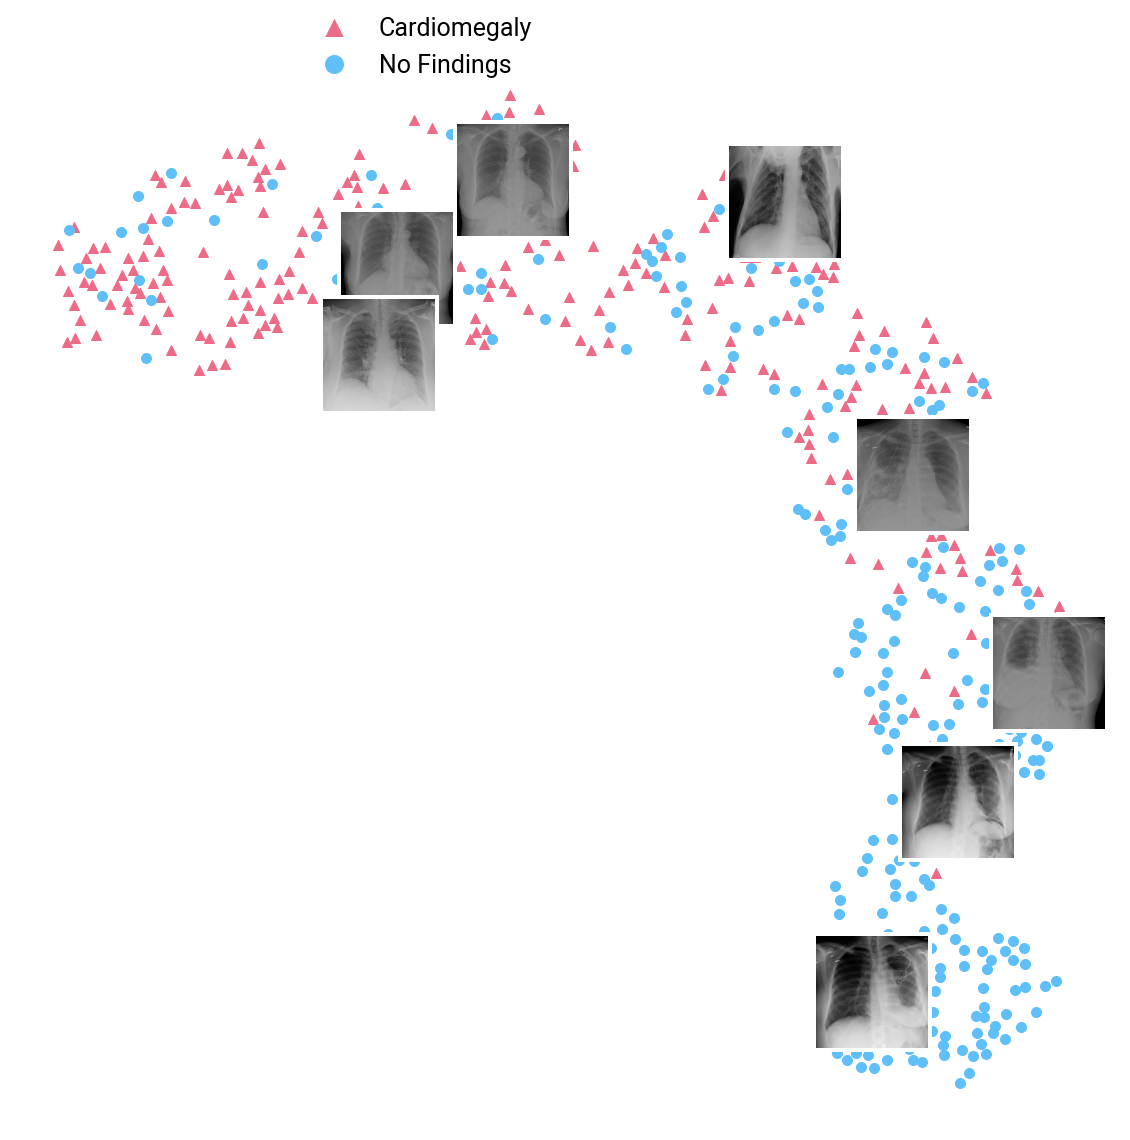

In [15]:

x, y = z[:, 0], z[:, 1]
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

positive_color = '#ED6B86'
negative_color = '#5FBFF9'

# colors = [positive_color if labels[i] else negative_color for i in range(len(embeddings))]
# markers = ['s' if labels[i] else 'o' for i in range(len(embeddings))]
positives = [[x[i], y[i]] for i in range(len(embeddings)) if labels[i]]
negatives = [[x[i], y[i]] for i in range(len(embeddings)) if not labels[i]]

positives = np.array(positives)
negatives = np.array(negatives)

fig, ax = plt.subplots(figsize=(20, 20))
# ax.scatter(x, y, color=colors, s=100)

for i in [180, 179, 177, 176, 347, 342, 340, 339]:  
    img = rearrange(images[i], 'c w h -> w h c')
    imgbox = OffsetImage(img, zoom=0.5, cmap='Greys_r')
    ab = AnnotationBbox(imgbox, (x[i], y[i]),
                    xycoords='data', boxcoords='offset points', bboxprops=dict(linewidth=0))
    ax.add_artist(ab)    

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)


# plt.scatter(x, y, color=colors, marker = markers)
plt.scatter(positives[:,0], positives[:, 1], c=positive_color, marker='^', s=100)
plt.scatter(negatives[:,0], negatives[:, 1], c=negative_color, marker = 'o', s=100)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


path = 'fonts/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=25)

legend_elements = [
    Line2D([0], [0], marker='^', color='w', label='Cardiomegaly', markerfacecolor=positive_color, markersize=20),
    Line2D([0], [0], marker='o', color='w', label='No Findings',markerfacecolor=negative_color, markersize=20)
]

lgnd = ax.legend(handles=legend_elements, bbox_to_anchor=(0.25, 0.95), frameon=False, prop=fontprop)
plt.savefig('figures/tsne.png', bbox_inches='tight')

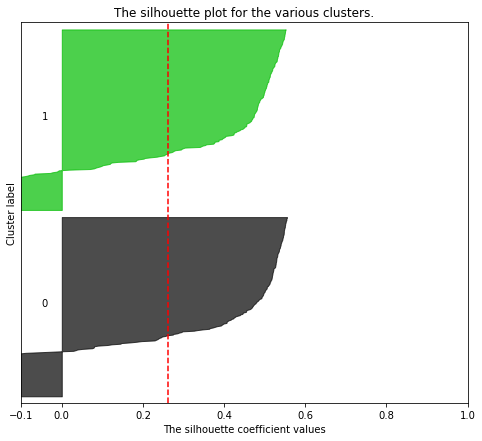

In [16]:
from sklearn.metrics import confusion_matrix, silhouette_score, silhouette_samples
silhouette_avg = silhouette_score(embeddings, labels)
import matplotlib.cm as cm

fig, ax1 = plt.subplots(figsize=(1,5))


# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
X = embeddings
n_clusters = 2

ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
sample_silhouette_values = silhouette_samples(X, labels)
fig.set_size_inches(8, 7)
cluster_labels = labels
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

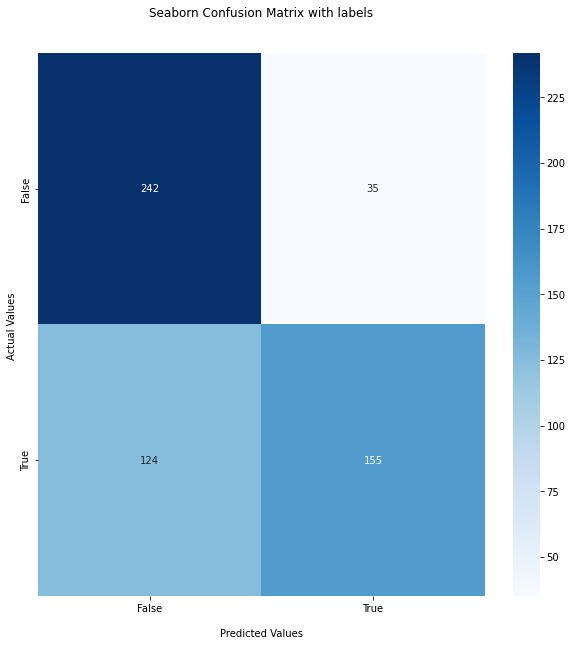

In [17]:

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(confusion_matrix(labels, pred_labels), annot=True, cmap='Blues', ax = ax, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
model.blocks[-2]

Block(
  (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
  (attn): Attention(
    (qkv): Linear(in_features=192, out_features=576, bias=True)
    (attn_drop): Dropout(p=0.0, inplace=False)
    (proj): Linear(in_features=192, out_features=192, bias=True)
    (proj_drop): Dropout(p=0.0, inplace=False)
  )
  (drop_path): Identity()
  (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
  (mlp): Mlp(
    (fc1): Linear(in_features=192, out_features=768, bias=True)
    (act): GELU()
    (fc2): Linear(in_features=768, out_features=192, bias=True)
    (drop): Dropout(p=0.0, inplace=False)
  )
)

## Saliency Maps

In [5]:
from pytorch_grad_cam import GradCAM, \
    ScoreCAM, \
    GradCAMPlusPlus, \
    AblationCAM, \
    XGradCAM, \
    EigenCAM, \
    EigenGradCAM, \
    LayerCAM, \
    FullGrad
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
encoder_choice = 'vit'
class_name = 'Cardiomegaly'
device = "cuda"


model_weights_path = 'weights/{}_{}_{}_weights'.format(class_name, "norm", 7)
model = get_encoder(encoder_choice=encoder_choice)
model = model.to(device)
model.load_state_dict(torch.load(model_weights_path))
model.eval()

target_layers = [model.blocks[-1].norm1]


def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
                                      height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

cam = EigenCAM(model=model, target_layers=target_layers,
                                   use_cuda=True,
                                   reshape_transform=reshape_transform,
                                 )
# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested category.
targets = None

image = np.array([images[20]])
image = transforms.CenterCrop(224)(torch.from_numpy(image))
grayscale_cam = cam(input_tensor=image,
                    targets=targets ,
                    eigen_smooth=True,
                    aug_smooth=False)

grayscale_cam = grayscale_cam[0, :]

xray = rearrange(images[20], 'c w h -> w h c')

cam_image = show_cam_on_image(xray, grayscale_cam, use_rgb=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.05)

ax[1].imshow(cam_image)

for spine in ax[1].spines:
    ax[1].spines[spine].set_visible(False)
    
ax[1].get_xaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])


ax[0].imshow(xray)

for spine in ax[0].spines:
    ax[0].spines[spine].set_visible(False)
    
xticks = ax[0].get_xaxis().set_ticks([])
yticks = ax[0].get_yaxis().set_ticks([])

path = 'fonts/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=25)

label = ax[0].text(1.0, -0.05, 'Cardiomegaly GradCAM Heat Map', ha='center', va='top',
               transform=ax[0].transAxes, fontproperties=fontprop)

ax[0].legend()

plt.savefig('figures/saliency.png', bbox_inches='tight')

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 23.69 GiB total capacity; 7.37 GiB already allocated; 14.62 MiB free; 7.80 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF